In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [34]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [35]:
df.shape

(270, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [37]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [38]:
df.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


In [39]:
df.replace({'Heart Disease':{'Absence':0,'Presence':1}},inplace=True)

In [40]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

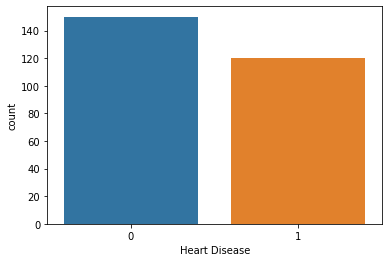

In [41]:
sns.countplot(x='Heart Disease',data=df)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

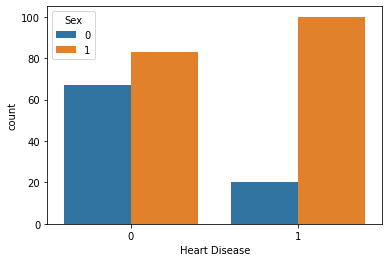

In [42]:
sns.countplot(x='Heart Disease',data=df,hue='Sex')

In [43]:
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [44]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [45]:
# X

In [46]:
# y

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr =LogisticRegression()

In [51]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
pred_train = lr.predict(X_train)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
print(classification_report(pred_train,y_train))
print(confusion_matrix(pred_train,y_train))
print(accuracy_score(pred_train,y_train))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       125
           1       0.83      0.88      0.86        91

    accuracy                           0.88       216
   macro avg       0.87      0.88      0.87       216
weighted avg       0.88      0.88      0.88       216

[[109  16]
 [ 11  80]]
0.875


In [55]:
pred_test = lr.predict(X_test)

In [56]:
print(classification_report(pred_test,y_test))
print(confusion_matrix(pred_test,y_test))
print(accuracy_score(pred_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.75      0.86      0.80        21

    accuracy                           0.83        54
   macro avg       0.82      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54

[[27  6]
 [ 3 18]]
0.8333333333333334


In [57]:
input_data = (70,1,4,130,322,0,2,109,0,2.4,2,3,3)

arr = np.asarray(input_data)

arr_reshaped = arr.reshape(1,-1)

lr.fit(X_train,y_train)

prediction = lr.predict(arr_reshaped)

if (prediction[0] == 1):
    print('Person have Heart Disease')
else:
    print('Person dont have Heart Disease')

Person have Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
input_data = (67,0,3,115,564,0,2,160,0,1.6,2,0,7)

arr = np.asarray(input_data)

arr_reshaped = arr.reshape(1,-1)

lr.fit(X_train,y_train)

prediction = lr.predict(arr_reshaped)

if (prediction[0] == 1):
    print('Person have Heart Disease')
else:
    print('Person dont have Heart Disease')

Person dont have Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
